# <font color=green\>Estatísticas Descritivas<font>

In [102]:
# Import dos módulos utilizados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='darkgrid')

In [488]:
# import da base
dados = pd.read_excel('Planilha Suporte - Introdução Estatística (Final).xlsx', sheet_name='Tabela de Frequências' ,usecols='A:B',  engine="openpyxl")

In [489]:
# Função auxiliar para remoção de caracteres especiais
import unicodedata
import re

def removerAcentosECaracteresEspeciais(palavra):

    # Unicode normalize transforma um caracter em seu equivalente em latin.
    nfkd = unicodedata.normalize('NFKD', palavra)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

In [490]:
# Removendo caracteres especiais
dados['País de Origem'] = dados['País de Origem'].apply(lambda x: removerAcentosECaracteresEspeciais(x))

## <font color=green\>Tipo de variáveis<font>

In [491]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Indivíduo       300 non-null    int64 
 1   País de Origem  300 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [492]:
dados.head()

,Indivíduo,País de Origem
0,1,Brasil
1,2,Inglaterra
2,3,Japao
3,4,EUA
4,5,Brasil


Em relação as variáveis presente do dataset, temos:

- País de Origem: variável qualitativa
- Indivíduo: variável quantitativa discreta

## <font color=green\>Tabela de Frequência<font>

In [493]:
# numero total de observações
n = dados.shape[0]

In [494]:
# frequência absoluta
frequencia_absoluta = dados.groupby(['País de Origem'])[['Indivíduo']].count().sort_values(by='País de Origem')
frequencia_absoluta.rename(columns={'Indivíduo':'frequencia_absoluta'}, inplace=True)

In [495]:
# frequência relativa
frequencia_relativa = round(frequencia_absoluta/n * 100, 1)
frequencia_relativa.rename(columns={'frequencia_absoluta':'frequencia_relativa'}, inplace=True)

In [496]:
# frequência acumulada
frequencia_acumulada = frequencia_absoluta.cumsum()
frequencia_acumulada.rename(columns={'frequencia_absoluta':'frequencia_acumulada'}, inplace=True)

In [497]:
# frequencia relativa acumulada
frequencia_relativa_acumulada = round(frequencia_acumulada/n * 100, 1)
frequencia_relativa_acumulada.rename(columns={'frequencia_acumulada':'frequencia_acumulada_relativa'}, inplace=True)

In [498]:
tabela_de_frequencias = pd.concat([frequencia_absoluta, frequencia_relativa, frequencia_acumulada, frequencia_relativa_acumulada], axis=1)
tabela_de_frequencias

,frequencia_absoluta,frequencia_relativa,frequencia_acumulada,frequencia_acumulada_relativa
País de Origem,,,,
Africa do Sul,14,4.7,14,4.7
Alemanha,10,3.3,24,8.0
Argentina,10,3.3,34,11.3
Australia,15,5.0,49,16.3
Brasil,59,19.7,108,36.0
Canada,9,3.0,117,39.0
Chile,7,2.3,124,41.3
China,18,6.0,142,47.3
EUA,35,11.7,177,59.0


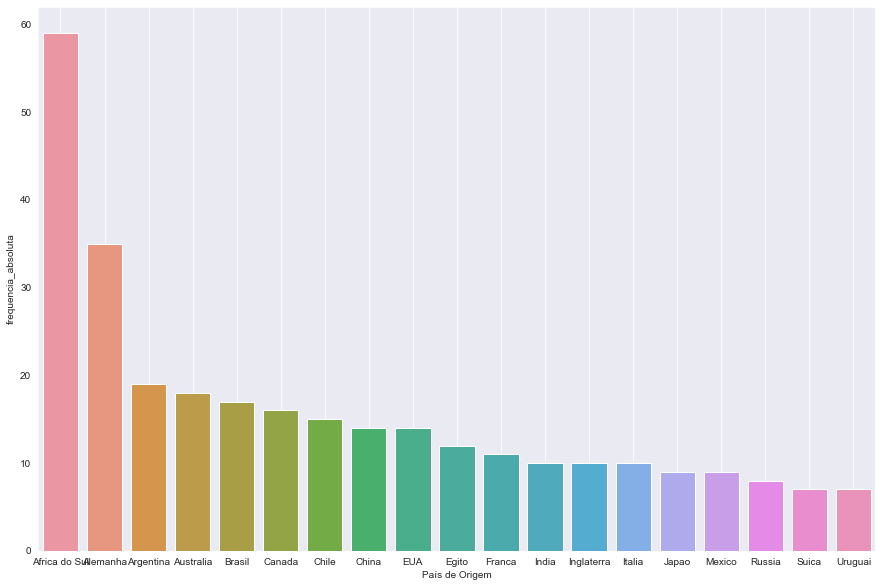

In [499]:
ax = sns.barplot(data=tabela_de_frequencias[['frequencia_absoluta']].sort_values(by='frequencia_absoluta', ascending=False), y='frequencia_absoluta', x=tabela_de_frequencias.index, orient="v")
ax.figure.set_size_inches(15,10)
ax.grid()

## <font color=green\>Medidas de Posição, Dispersão e Forma<font>

In [193]:
# import da base
dados = pd.read_excel('Planilha Suporte - Introdução Estatística (Final).xlsx', sheet_name='Descritivas - Quantitativa' ,usecols='A:B',  engine="openpyxl", nrows=100)

In [194]:
# Informações relativas a base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Nº Observação  100 non-null    int64
 1   Preço ($)      100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [190]:
# Quantidade de observações
dados.shape

(103, 2)

In [199]:
# Renomear colunas de forma a tornar melhor as manipulações posteriores
dados.rename(columns={'Nº Observação':'n_observacoes', 'Preço ($)':'preco'}, inplace=True)

In [203]:
# Estatisticas básicas 
tabela_estatistica = dados.preco.describe()
tabela_estatistica

count    100.000000
mean     190.770000
std       15.621052
min      149.000000
25%      179.000000
50%      189.000000
75%      199.000000
max      239.000000
Name: preco, dtype: float64

In [211]:
# Erro padrão
from scipy.stats import sem

sem(dados.preco)

1.5621052228555947

In [227]:
# Cálculo do quartil
np.quantile(dados.preco, q=[1/4,3/4])

array([179., 199.])

In [224]:
# Cálculo do percentil
np.percentile(dados.preco,q=[20,25,44,60,75,85])

array([179. , 179. , 189. , 196.4, 199. , 205. ])

In [240]:
# Variância
dados.preco.var()

244.01727272727283

In [241]:
# Amplitude
dados.preco.max() - dados.preco.min()

90

In [262]:
# Desvio padrão
dados.preco.std()

15.62105222855595

In [265]:
# Erro padrão
dados.preco.std()/np.sqrt(dados.preco.shape[0])

1.562105222855595

In [243]:
# Coeficiente de varição
from scipy.stats import variation
variation(dados.preco)

0.081473768002304

In [245]:
# Coeficiente de assimetria
from scipy.stats import skew
skew(dados.preco)

8.85513977544687

In [246]:
# Curtose
from scipy.stats import kurtosis
kurtosis(dados.preco)

0.5770398783009636

In [248]:
from statsmodels.stats.descriptivestats import describe

In [255]:
describe(dados.preco)

,preco
nobs,100.000000
missing,0.000000
mean,190.770000
std_err,0.156211
upper_ci,191.076167
lower_ci,190.463833
std,15.621052
iqr,20.000000
iqr_normal,14.826022
mad,12.076200


# <font color=green> Relação entre variáveis </font>

## <font color=green> Associação - Qui² </font>

> **Exemplo**: Um estudo foi realizado com 200 pessoas com o intuito de analisar
o comportamento conjunto da variável “operadora de plano de saúde” com a
variável “nível de satisfação” do consumidor. O objetivo é analisar se existe a
associação estatisticamente significativa entre tais variáveis. (Fonte: Fávero e
Belfiore, 2017, Cap. 8)

In [417]:
# Tabela de frequências observadas
F_Observada = np.mat([[40,16,12],[32,24,16],[24,32,4]])

# Soma dos valores nas linhas e colunas
total_linhas = np.dot(F_Observada,np.ones(3)).T
total_colunas=np.dot(F_Observada.T,np.ones(3))

print('Tabela de frequências observadas:\n',F_Observada)
print('\nSoma das linhas:\n', total_linhas)
print('\nSoma das colunas:\n',total_colunas)

Tabela de frequências observadas:
 [[40 16 12]
 [32 24 16]
 [24 32  4]]

Soma das linhas:
 [[68.]
 [72.]
 [60.]]

Soma das colunas:
 [[96. 72. 32.]]


In [587]:
# Graus de liberdade
linhas = F_Observada.shape[0]
colunas = F_Observada.shape[1]
graus_de_liberdade = (linhas - 1)*(colunas - 1)
graus_de_liberdade

4

In [400]:
# Verificando se a soma dos elementos da linha é igual a soma dos elementos da coluna
np.sum(total_colunas) == np.sum(total_linhas)

True

In [564]:
# Construção da tabela de frequências absolutas esperadas
F_Esperadas = ((total_linhas @ total_colunas)/np.sum(total_linhas))
F_Esperadas

matrix([[32.64, 24.48, 10.88],
        [34.56, 25.92, 11.52],
        [28.8 , 21.6 ,  9.6 ]])

In [566]:
# Cáclculo dos resíduos
residuos = F_Observada - F_Esperadas
residuos

matrix([[ 7.36, -8.48,  1.12],
        [-2.56, -1.92,  4.48],
        [-4.8 , 10.4 , -5.6 ]])

In [567]:
# Residuos ao quadrado
residuos_quadrado = np.square(residuos)

In [570]:
# Valores Chi²
chi_quadrado = (residuos_quadrado / F_Esperadas).round(2)
chi_quadrado

array([[1.66, 2.94, 0.12],
       [0.19, 0.14, 1.74],
       [0.8 , 5.01, 3.27]])

In [573]:
valor_chi_quadrado = np.sum(chi_quadrado).round(3)
valor_chi_quadrado

15.87

In [591]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = F_Observada
print(table)

[[40 16 12]
 [32 24 16]
 [24 32  4]]


In [597]:
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f' % stat)
print('p=%.3f' % p)
print('dof=%d' % dof)
print(expected)

stat=15.861
p=0.003
dof=4
[[32.64 24.48 10.88]
 [34.56 25.92 11.52]
 [28.8  21.6   9.6 ]]


In [593]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=9.488, stat=15.861
Dependent (reject H0)


In [594]:
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.003
Dependent (reject H0)


## <font color=green> Correlação de Pearson </font>

> **Exemplo**

> O coordenador de um curso deseja analisar se existe correlação
entre as notas dos alunos em diferentes matérias. Para tanto, montou um
banco de dados com as notas de 30 alunos para as disciplinas de matemática,
física e literatura. Em seguida, deseja calcular os pares de correlações entre as
notas de matemática – física, matemática – literatura e física – literatura.
Quais são as correlações de Pearson obtidas?

In [849]:
# import da base
dados = pd.read_excel('Planilha Suporte - Introdução Estatística (Final).xlsx', 
                      sheet_name='Correlação de Pearson' ,
                      usecols='A:D',  
                      engine="openpyxl")

In [850]:
dados.rename(columns={'Nº Observação':'n_observacao',
                      'Nota Matemática':'matematica',
                      'Nota Física':'fisica',
                      'Nota Literatura':'literatura'},
            inplace=True)

In [851]:
# Descritiva
notas = dados.drop(['n_observacao'], axis=1)
notas.describe()

,matematica,fisica,literatura
count,30.00000,30.000000,30.000000
mean,6.77500,6.866667,6.566667
std,2.05354,1.716720,1.715715
min,3.00000,3.000000,3.000000
25%,5.00000,5.125000,5.125000
50%,6.75000,7.500000,6.500000
75%,8.37500,8.000000,8.000000
max,10.00000,10.000000,10.000000


- Temos na base 30 observações atribuídas para cada um dos atributos, sendo eles as notas de matemática, física e literatura.  
- Da Descritiva obtemos que a média da nota em física é a maior (nota 6,87) e a média da nota em literatura é a menor (nota 6,57).  
- Os seus desvios são aproximadamente iguais e a nota de matemática é a que apresenta maior desvio.

In [852]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## <font color=green\>Covariâncias<font>

<AxesSubplot:>

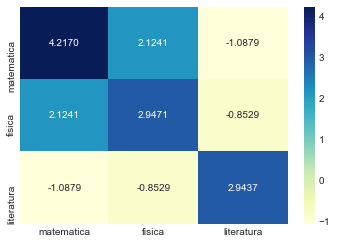

In [853]:
sns.heatmap(notas.cov(), annot=True, fmt='.4f', cmap="YlGnBu")

## <font color=green\>Correlação<font>

<AxesSubplot:>

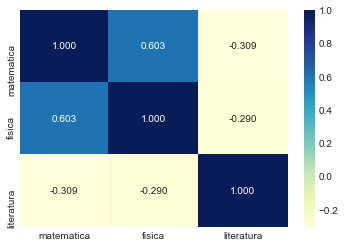

In [854]:
matrix_correlacao = notas.corr(method='pearson')
sns.heatmap(matrix_correlacao, annot=True, fmt='.3f', cmap="YlGnBu")

## <font color=green\> Análise entre os pares de variáveis <font>

In [1007]:
from scipy.stats import pearsonr
from scipy.stats import linregress

def p_valor(dados1, dados2, n):
    # correlação de pearson e p-valor
    _, _, r, p, _ = linregress(dados1, dados2)
    
    # cálculo da estatística t
    statt = r/np.sqrt((1-(r**2))/(n-2))
    
    return r, p , statt

> Matematica e Física

In [1034]:
r1, pvalor1, statt1 = p_valor(dados.matematica, dados.fisica, 30) 
r1, pvalor1, statt1

(0.6025321124160093, 0.0004260030729539871, 3.9948899481293085)

> Matematica e Literatura

In [1035]:
r2, pvalor2, statt2 = p_valor(dados.matematica, dados.literatura, 30) 
r2, pvalor2, statt2

(-0.30878277832686235, 0.09686159239066, -1.7178728870656619)

> Fisica e Literatura

In [1036]:
r3, pvalor3, statt3 = p_valor(dados.fisica, dados.literatura, 30) 
r3, pvalor3, statt3

(-0.28956102521926375, 0.12064697753111915, -1.600791547335471)

> Valor crítico

In [1018]:
from scipy.stats import t as t_student

In [1013]:
significancia = 0.05
confianca = 1 - significancia

In [1048]:
# Como a função ppf é bicaudal então o valor de significância é dividido por 2, ou seja, 0.025 para cada lado
t_alpha = np.abs(t_student.ppf(significancia/2, 28))
np.abs(t_alpha)

2.048407141795244

<font color=green\> Teste de hipótese<font>

In [1053]:
if np.abs(statt1) >= t_alpha:
    print('Rejeita H0')
else:
    print('Aceito H0')

Rejeita H0


In [1054]:
if np.abs(statt2) >= t_alpha:
    print('Rejeita H0')
else:
    print('Aceito H0')

Aceito H0


In [1055]:
if np.abs(statt3) >= t_alpha:
    print('Rejeita H0')
else:
    print('Aceito H0')

Aceito H0


# <font color=green\> Distribuições de Probabilidades <font>

> No Scipy as funções e documentações de distribuições discretas podem ser encontradas no seguinte link:
- documentação: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html
- funções: https://docs.scipy.org/doc/scipy/reference/stats.html

## <font color=green\> Variáveis discretas <font>

> ### Distribuições de probabilidade para variáveis discretas 
**1** - Uniforme  
**2** - Bernoulli  
**3** - Binomial  
**4** - Binomial negativa  
**5** - Poisson

### <font color=green\> Distribuição Uniforme Discreta <font>

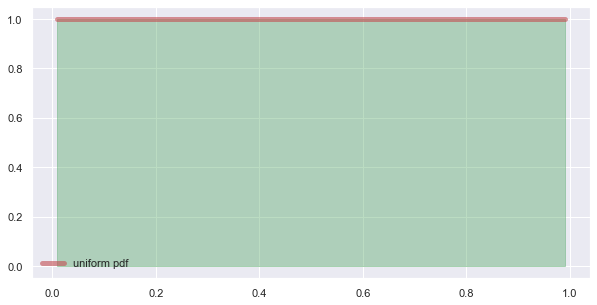

In [103]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,5))

# Função densidade de probabilidade (fdp ou pdf)
# ppf é o percentile point function
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.fill_between(x, uniform.pdf(x), color ='g', alpha=0.4 )

ax.legend(loc='best', frameon=False)
plt.show()

### <font color=green\> Distribuição Bernoulli <font>

Os valores da variável podem assumir apenas dois resultados possíveis, sendo que tais resultados são chamados de sucesso (x=1) ou fracasso (x=0)

$$P\left ( X= x \right ) = p^{x} \cdot \left ( 1 - p \right )^{1-x}$$

> **Exemplo** - A probabilidade (p) de que um candidato seja aprovado (x=1) em
um exame para um conselho de classes é de 48%. Se cada candidato só pode
realizar o exame uma vez, analise as probabilidades possíveis por meio da
distribuição de Bernoulli

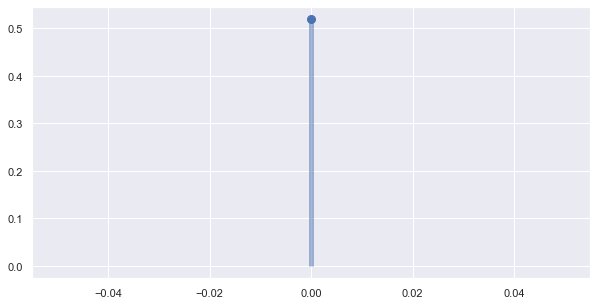

In [104]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,5))

# Probabilidade de sucesso
p = 0.48

# Mostrando a função de massa de probabilidade (pmf)
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

plt.show()

In [79]:
print('A probabilidade (p) de uma candidato seja aprovado (x=1) em um exame para um conselho de classes é de %.2f.' % bernoulli.pmf(1,0.48))

A probabilidade (p) de uma candidato seja aprovado (x=1) em um exame para um conselho de classes é de 0.48.


In [80]:
print('A probabilidade (p) de uma candidato seja reprovado (x=0) em um exame para um conselho de classe é de %.2f.' % bernoulli.pmf(0,0.48))

A probabilidade (p) de uma candidato seja reprovado (x=0) em um exame para um conselho de classe é de 0.52.


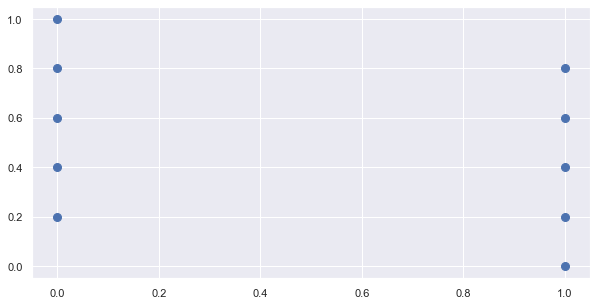

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

for i in np.arange(0,1,0.2):
    # Probabilidade de sucesso
    p = i
    # Mostrando a função de massa de probabilidade (pmf)
    x = np.arange(0,1.1,1)
    ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
#    ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

plt.show()

### <font color=green\> Distribuição Binomial <font>

A distribuição binomial ocorre quando há (n) repetições independentes do experimento de Bernoulli e a probabilidade de sucesso (p) é constante em todas as repetições

$$P\left ( X= k \right ) = \binom{n}{k}\cdot p^{k} \cdot \left ( 1 - p \right )^{n-k}$$

onde,
- k é a quantidade de sucessos
- n repetições do experimento

> **Exemplo** - Em uma indústria, sabe-se que a probabilidade (p) de encontrar
peças defeituosas em cada lote produzido é 6,50%. São produzidos 12 lotes
(n) da peça por mês. Analise as seguintes probabilidades (k):  
a) Qual a probabilidade de encontrar peças defeituosas em 2 lotes no mês?  
b) Qual a probabilidade de encontrar peças defeituosas em 4 lotes no mês?  
c) Qual a probabilidade de encontrar peças defeituosas em no máximo 2 lotes?  

In [85]:
from scipy.stats import binom

> a Qual a probabilidade de encontrar peças defeituosas em 2 lotes no mês?  

In [86]:
n, p, k = 12, 0.065, 2
print('A probabilidade é de {} %'.format((binom.pmf(k, n, p) * 100).round(2)))

A probabilidade é de 14.24 %


> b) Qual a probabilidade de encontrar peças defeituosas em 4 lotes no mês? 

In [87]:
n, p, k = 12, 0.065, 4
print('A probabilidade é de {} %'.format((binom.pmf(k, n, p) * 100).round(2)))

A probabilidade é de 0.52 %


> c) Qual a probabilidade de encontrar peças defeituosas em no máximo 2 lotes?

In [107]:
n, p, k = 12, 0.065, 3

In [108]:
lst_prob = []
[lst_prob.append(binom.pmf(i,n,p)) for i in range(k)]
print('A probabilidade é de {} %'.format((np.sum(lst_prob * 100).round(2))))

A probabilidade é de 96.12 %


> Explorando graficamente

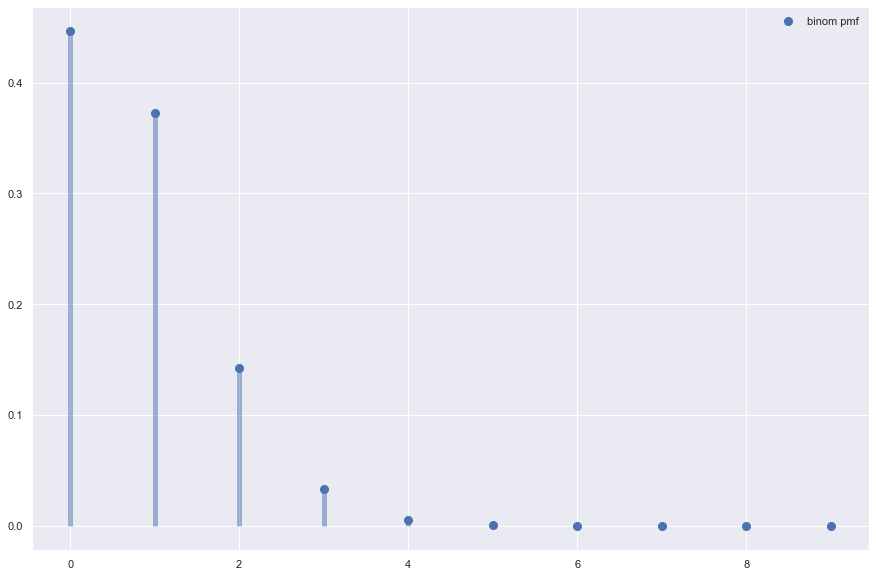

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

x = np.arange(binom.ppf(0.01, n, p), 10)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

ax.legend(loc='best', frameon=False)
plt.show()

### <font color=green\> Distribuição Binomial Negativa <font>

- Na binomial negativa, são realizados (x) ensaios independentes de Bernoulli até que sejam obtidos (k) sucessos.  
- A probabilidade de sucesso (p) é constante em todos os ensaios realizados.  
- A variável no modelo binomial negativa indica a quantidade de ensaior (x)

$$P\left ( X= x \right ) = \binom{x - 1}{k - 1}\cdot p^{k} \cdot \left ( 1 - p \right )^{x-k}$$

> **Exemplo** - Em um parque de diversões, existe uma máquina em que o jogador
deve capturar algum item utilizando os comandos de um braço mecânico.
Considere que a probabilidade (p) de que o jogador consiga capturar algum
item em cada jogada é 11%. Identifique as seguintes probabilidades:  
a) De que o jogador necessite de 10 jogadas para capturar 3 itens.  
b) De que o jogador necessite de 20 jogadas para capturar 3 itens.  
c) De que o jogador necessite de 5 jogadas para capturar 1 item.

In [110]:
from scipy.stats import nbinom

a) De que o jogador necessite de 10 jogadas para capturar 3 itens. 

In [111]:
k, n, p = 10, 3, 0.11
print('A probabilidade é de {} %'.format((nbinom.pmf(k - n, n, p) * 100).round(2)))

A probabilidade é de 2.12 %


> Importante ressaltar que a função está na forma 'padronizada'. Ou seja, Para fazer o deslocamento da distribuição é preciso usar o parâmetro loc. Mais especificamente, nbinom.pmf(k, n, p, loc) é equivalente a nbinom.pmf(k - loc, n, p) como também foi realizado na função do item a) acima.

In [112]:
n, p = 3, 0.11
k = np.arange(0,10)
binomial = nbinom.pmf(k,n,p)
list((binomial*100).round(2))

[0.13, 0.36, 0.63, 0.94, 1.25, 1.56, 1.85, 2.12, 2.36, 2.56]

b) De que o jogador necessite de 20 jogadas para capturar 3 itens.  

In [113]:
k, n, p = 20, 3, 0.11
print('A probabilidade é de {} %'.format(((nbinom.pmf(k-n, n, p) * 100)).round(2)))

A probabilidade é de 3.14 %


c) De que o jogador necessite de 5 jogadas para capturar 1 item.

In [114]:
k, n, p = 5, 1, 0.11
print('A probabilidade é de {} %'.format(((nbinom.pmf(k-1, n, p) * 100)).round(2)))

A probabilidade é de 6.9 %


> Grafico

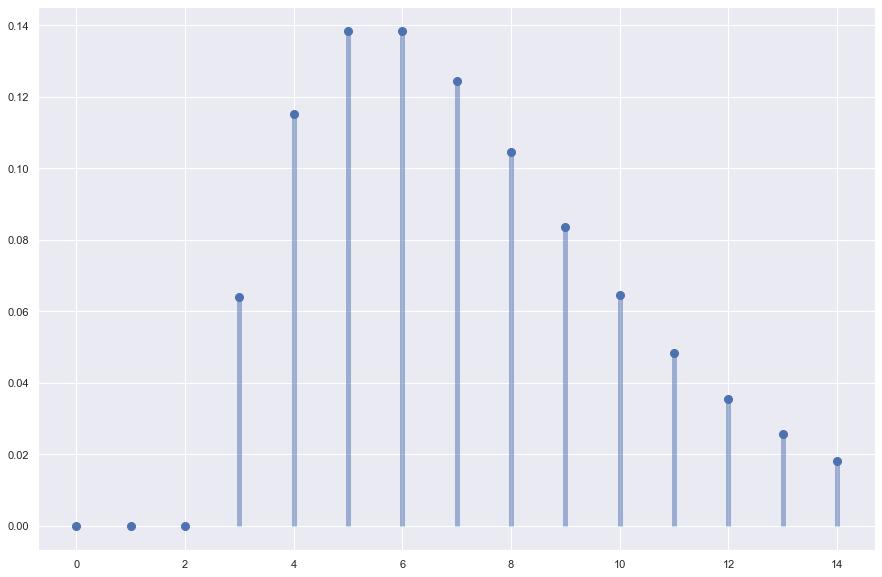

In [115]:
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))

n, p = 3, 0.40

x = np.arange(nbinom.ppf(0.01, n, p),
              nbinom.ppf(0.99, n, p))
ax1.plot(x, nbinom.pmf(x - n, n, p), 'bo', ms=8, label='nbinom pmf')
ax1.vlines(x, 0, nbinom.pmf(x - n, n, p), colors='b', lw=5, alpha=0.5)

plt.show()

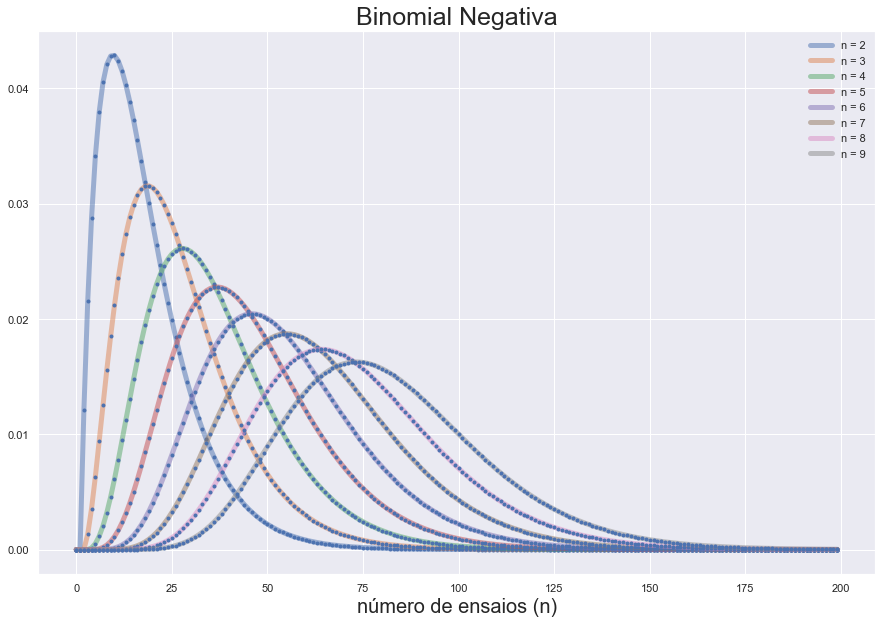

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

for i in range(2,10,1):
    n, p = i, 0.11

    x = np.arange(0,200)
    ax.plot(x, nbinom.pmf(x - n, n, p), label='n = {}'.format(i), lw=5, alpha=0.5)
    ax.plot(x, nbinom.pmf(x - n, n, p), 'bo', ms=3)
    ax.legend(loc='best', frameon=False)
    plt.xlabel('número de ensaios (n)', fontdict={'size':20})
    plt.title('Binomial Negativa', fontdict={'size':25})

plt.show()

### <font color=green\> Poisson <font>

- A distribuição de Poisson indica a probabilidade de sucesso do número de sucessos (k) em uma determinada exposição contínua.  

$$P\left ( X= k \right ) = \frac{e^{-\lambda}\cdot \lambda ^{k}}{k!}$$  

$\lambda$ - é a taxa média estimada de ocorrências do evento (sucesso) em dada exposição

**Exemplo** - Um médico notou que a taxa média de ocorrência (𝝀) de pacientes
com certa doença rara em seu consultório é de 2 por ano. Aceitando que esta
variável tenha distribuição Poisson, estime:  
a) A probabilidade de que o médico receba 1 paciente com a doença em um ano.  
b) A probabilidade de que o médico receba 3 pacientes com a doença em um ano.  
c) A probabilidade de que o médico não receba pacientes com a doença em um ano.  
d) A probabilidade de que o médico receba 10 pacientes com a doença nos próximos 2
anos.

In [117]:
from scipy.stats import poisson

In [118]:
# Taxa média de ocorrencia por ano
mu = 2

a) A probabilidade de que o médico receba 1 paciente com a doença em um ano.  

In [119]:
k = 1
print('A probabilidade é de {} %'.format((poisson.pmf(k, mu)*100).round(2)))

A probabilidade é de 27.07 %


b) A probabilidade de que o médico receba 3 pacientes com a doença em um ano.  

In [120]:
k = 3
print('A probabilidade é de {} %'.format((poisson.pmf(k, mu)*100).round(2)))

A probabilidade é de 18.04 %


c) A probabilidade de que o médico não receba pacientes com a doença em um ano. 

In [121]:
k = 0
print('A probabilidade é de {} %'.format((poisson.pmf(k, mu)*100).round(2)))

A probabilidade é de 13.53 %


d) A probabilidade de que o médico receba 10 pacientes com a doença nos próximos 2
anos.

In [122]:
k = 5
print('A probabilidade é de {} %'.format((poisson.pmf(k, mu)*100).round(2)))

A probabilidade é de 3.61 %


>Graficamente

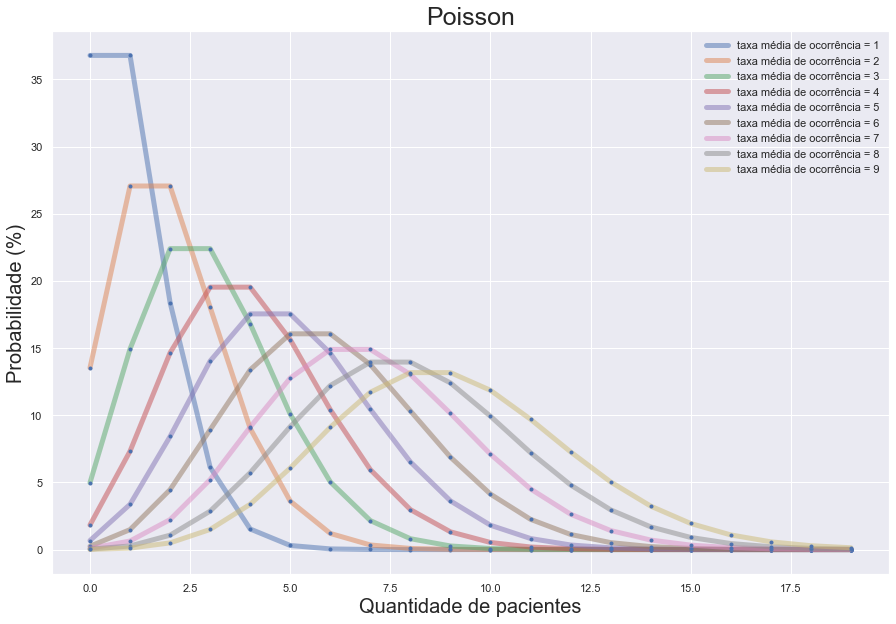

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

for i in np.arange(1, 10, 1):
    mu = i
    k = np.arange(0,20)
    ax.plot(k, poisson.pmf(k, mu)*100, label='taxa média de ocorrência = {}'.format(mu), lw=5, alpha=0.5)
    ax.plot(k, poisson.pmf(k, mu)*100, 'bo', ms=3)
    ax.legend(loc='best', frameon=False)
    plt.xlabel('Quantidade de pacientes', fontdict={'size':20})
    plt.ylabel('Probabilidade (%)', fontdict={'size':20})
    plt.title('Poisson', fontdict={'size':25})

plt.show()

## <font color=green\>Variáveis contínuas<font>

> **Distribuições para variáveis contínuas**  
**1** - Normal (Normal Padrão)  
**2** - Qui-quadrado  
**3** - t de Student  
**4** - F de Snedecor  

### <font color=green\> Normal <font>

$$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

In [716]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


**Exercício** - Um investidor calculou que o retorno médio mensal de uma ação
na bolsa de valores foi 2,80%. No mesmo período, o desvio padrão dos
retornos da ação foi de 1,20%. Com base na distribuição normal, calcule:  
a) A probabilidade de que o retorno da ação seja maior do que 4% ao mês.  
b) A probabilidade de que o retorno da ação seja menor do que 3% ao mês.  
c) A probabilidade de que o retorno da ação seja negativo.  
d) A probabilidade de que o retorno da ação seja maior que 1% e menor que 5% ao mês.  

In [128]:
from scipy.stats import norm

In [144]:
media = 2.8
desvio_padrao = 1.2

a) A probabilidade de que o retorno da ação seja maior do que 4% ao mês.  

In [157]:
# Padronizando o valor
Z = (4 - media)/desvio_padrao
print('Z = {}'.format(round(Z,2)))

Z = 1.0


In [158]:
probabilidade = 1 - norm.cdf(Z)
print('---------------Resumo Resultado----------------')
print('P(Z > {}) = {}'.format(round(Z,2),round(probabilidade,4)))
print('A probabilidade é de {} %'.format((probabilidade*100).round(2)))

---------------Resumo Resultado----------------
P(Z > 1.0) = 0.1587
A probabilidade é de 15.87 %


In [159]:
# Outra maneira de calcular P(x>=4) é utilizando o método sf
(norm.sf(Z)*100).round(2)

15.87

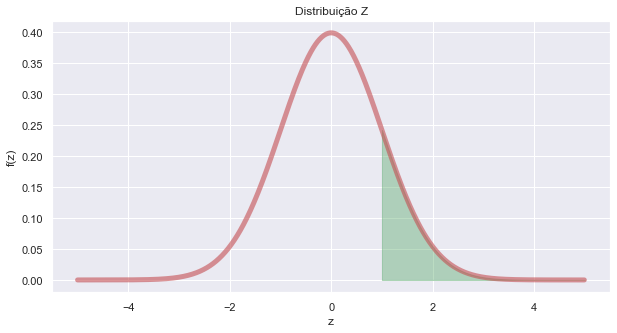

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.arange(-5, 5, 0.01)
y = norm.pdf(x)

ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='norm pdf')

x=np.linspace(Z, 5, 1000)
ax.fill_between(x, norm.pdf(x), color ='g', alpha=0.4 )

plt.title('Distribuição Z')
plt.xlabel('z')
plt.ylabel('f(z)')

plt.show()

b) A probabilidade de que o retorno da ação seja menor do que 3% ao mês.  

In [161]:
Z = (3 - media)/desvio_padrao
Z

0.16666666666666682

In [162]:
# P(X < 3) = ?
probabilidade = norm.cdf(Z)
print('---------------Resumo Resultado----------------')
print('P(Z < {}) = {}'.format(round(Z,2),round(probabilidade,4)))
print('A probabilidade é de {} %'.format((probabilidade*100).round(2)))

---------------Resumo Resultado----------------
P(Z < 0.17) = 0.5662
A probabilidade é de 56.62 %


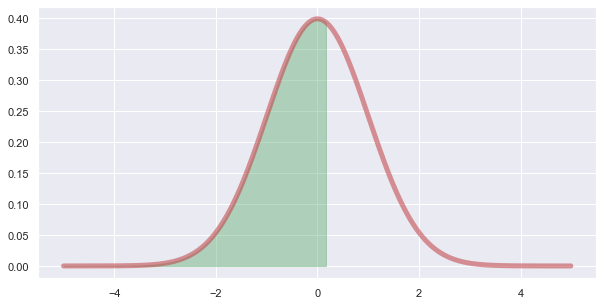

In [164]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.arange(-5, 5, 0.01)
y = norm.pdf(x)

ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='norm pdf')

x = np.linspace(-5, Z,1000)
ax.fill_between(x, norm.pdf(x), color ='g', alpha=0.4)

plt.show()

c) A probabilidade de que o retorno da ação seja negativo. 

In [165]:
Z = (0 - media)/desvio_padrao

In [168]:
probabilidade = norm.cdf(Z)
print('---------------Resumo Resultado----------------')
print('P(Z < {}) = {}'.format(round(Z,2),round(probabilidade,4)))
print('A probabilidade é de {} %'.format((probabilidade*100).round(4)))

---------------Resumo Resultado----------------
P(Z < -2.33) = 0.0098
A probabilidade é de 0.9815 %


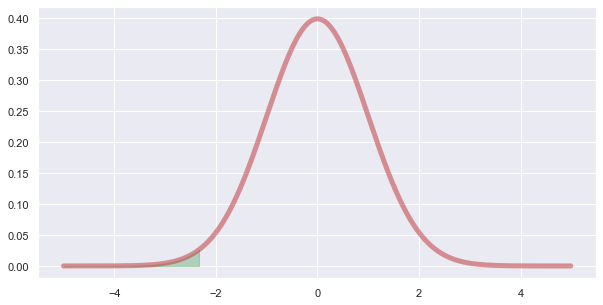

In [169]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.arange(-5, 5, 0.01)
y = norm.pdf(x)

ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='norm pdf')

x = np.linspace(-5, Z,1000)
ax.fill_between(x, norm.pdf(x), color ='g', alpha=0.4)

plt.show()

d) A probabilidade de que o retorno da ação seja maior que 1% e menor que 5% ao mês.  

In [170]:
Z_inferior = (1 - media)/desvio_padrao
Z_superior = (5 - media)/desvio_padrao

probabilidade_inferior = norm.cdf(Z_inferior)
probabilidade_superior = norm.cdf(Z_superior)

probabilidade = probabilidade_superior - probabilidade_inferior

In [171]:
print('---------------Resumo Resultado----------------')
print('P({} < Z < {}) = {}'.format(round(Z_inferior,2),round(Z_superior,2), probabilidade.round(4)))
print('A probabilidade é de {} %'.format((probabilidade*100).round(2)))

---------------Resumo Resultado----------------
P(-1.5 < Z < 1.83) = 0.8998
A probabilidade é de 89.98 %


> Graficamente

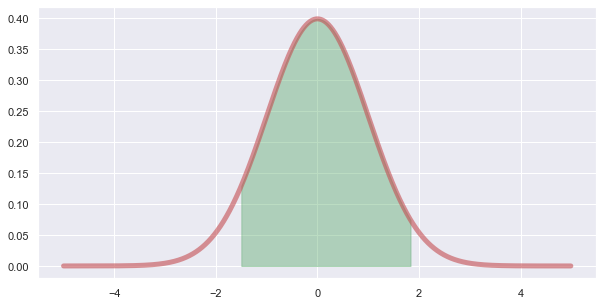

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.arange(-5, 5, 0.01)
y = norm.pdf(x)

ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='norm pdf')

x = np.linspace(Z_inferior, Z_superior,1000)
ax.fill_between(x, norm.pdf(x), color ='g', alpha=0.4)

plt.show()

### <font color=green\> Qui-quadrado <font>

**Exemplo** - Um pesquisador em botânica identificou que uma variável de seu
estudo segue uma distribuição qui-quadrado e tem 7 graus de liberdade. Com
base nestas informações, o pesquisador calculou:  
a) A probabilidade de que encontre um valor X>6.  
b) A probabilidade de que encontre um valor X<8.  
c) O valor de X que faz com que a P(X>x) seja 5%.  
d) O valor de X que faz com que a P(X<x) seja 90%.  

In [173]:
from scipy.stats import chi2, chi

In [174]:
df = 7

a) A probabilidade de que encontre um valor X>6.  

In [175]:
(1 - chi2.cdf(6, df)) *100

53.9749350395557

In [176]:
chi2.sf(6, df)*100

53.9749350395557

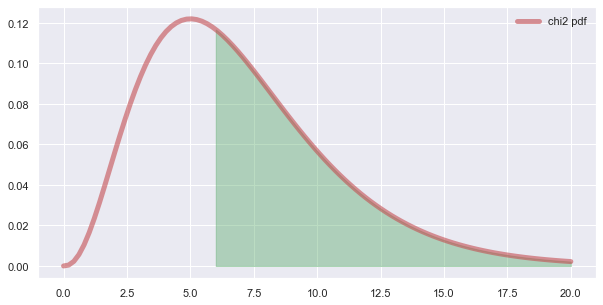

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0,20, 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

x = np.linspace(6, 20,1000)
ax.fill_between(x, chi2.pdf(x, df), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

b) A probabilidade de que encontre um valor X<8. 

In [178]:
chi2.cdf(8, df) * 100

66.74060974006919

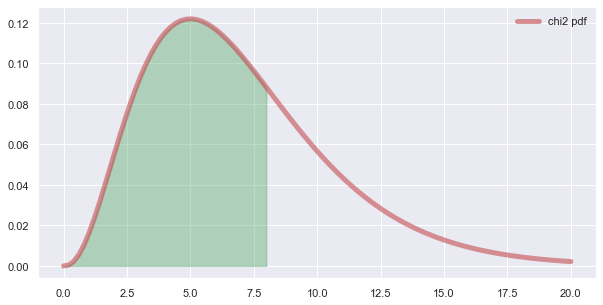

In [179]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0,20, 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

x = np.linspace(0,8,1000)
ax.fill_between(x, chi2.pdf(x, df), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

c) O valor de X que faz com que a P(X>x) seja 5%. 

In [180]:
chi2.ppf(0.95, df)

14.067140449340169

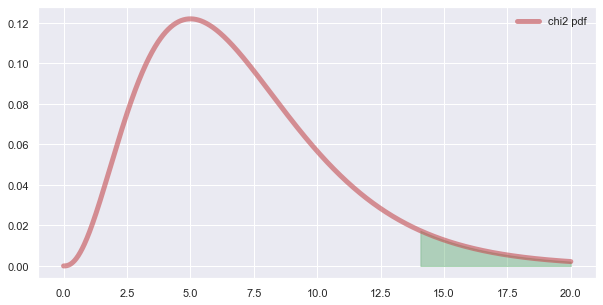

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0, 20, 1000)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

x_fill = np.arange(chi2.ppf(0.95, df), 20, 0.01)
ax.fill_between(x_fill, chi2.pdf(x_fill, df), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

d) O valor de X que faz com que a P(X<x) seja 90%.

In [182]:
chi2.ppf(0.10, df)

2.833106917815344

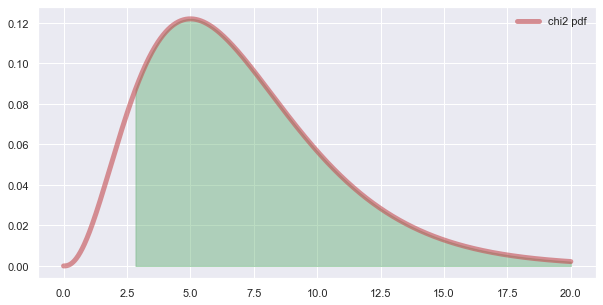

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0, 20, 1000)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')

x_fill = np.linspace(chi2.ppf(0.10, df), 20, 1000)
ax.fill_between(x_fill, chi2.pdf(x_fill, df), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

### <font color=green\> t-Student <font>

**Exemplo** - O gestor do controle de qualidade de uma empresa identificou que
uma variável relevante para seu controle apresenta distribuição t de Student
e tem 7 graus de liberdade. Quais são suas análises nas situações:  
a) A probabilidade de que encontre T > 2,5.  
b) A probabilidade de que encontre T < - 2,5.  
c) A probabilidade de que encontre T>-1 e T<2.  
d) O valor de T para que P(T>t) = 5%.

In [184]:
from scipy.stats import t as t_student

In [185]:
graus_de_liberdade = 7

a) A probabilidade de que encontre T > 2,5.  

In [186]:
# P(T > 2.5) = ?

probabilidade = t_student.sf(x=2.5, df=graus_de_liberdade)
print('probabilidade = %.2f' % probabilidade)

probabilidade = 0.02


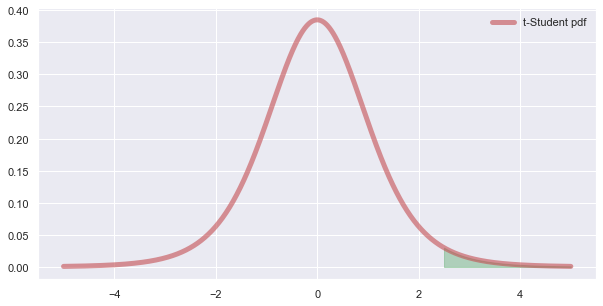

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(-5,5, 1000)
ax.plot(x, t_student.pdf(x, df=graus_de_liberdade), 'r-', lw=5, alpha=0.6, label='t-Student pdf')

x_fill = np.linspace(2.5, 5, 1000)
ax.fill_between(x_fill, t_student.pdf(x_fill, df=graus_de_liberdade), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

b) A probabilidade de que encontre T < - 2,5.

In [188]:
# P(T < -2.5) = ?
probabilidade = (1 - t_student.sf(x=-2.5, df=graus_de_liberdade))
print('probabilidade = %.4f' % probabilidade)

probabilidade = 0.0205


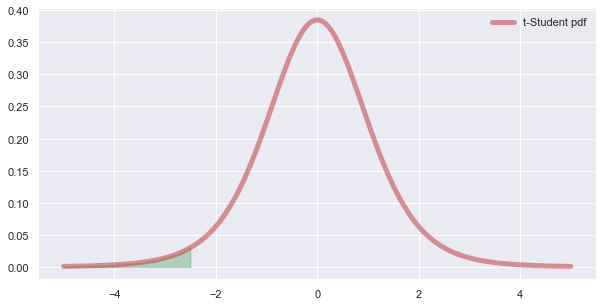

In [189]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(-5,5, 1000)
ax.plot(x, t_student.pdf(x, df=graus_de_liberdade), 'r-', lw=5, alpha=0.6, label='t-Student pdf')

x_fill = np.linspace(-5, -2.5, 1000)
ax.fill_between(x_fill, t_student.pdf(x_fill, df=graus_de_liberdade), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

c) A probabilidade de que encontre T>-1 e T<2.  

In [190]:
# P(T > -1) = ? e P(T < 2) = ?
prob_inferior = t_student.cdf(x=-1, df=graus_de_liberdade)
prob_superior = t_student.cdf(x=2, df=graus_de_liberdade)
probabilidade =(prob_superior - prob_inferior)
print('prob_superior = %.4f' % prob_superior)
print('prob_inferior = %.4f' % prob_inferior)
print('probabilidade = %.4f' % probabilidade)

prob_superior = 0.9572
prob_inferior = 0.1753
probabilidade = 0.7819


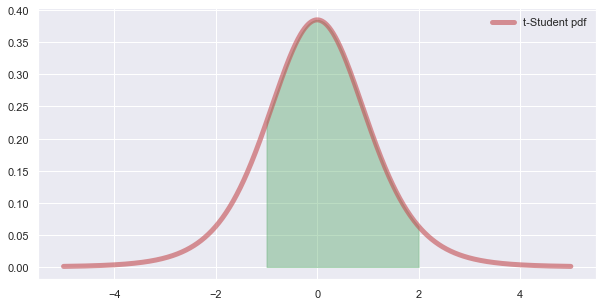

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(-5,5, 1000)
ax.plot(x, t_student.pdf(x, df=graus_de_liberdade), 'r-', lw=5, alpha=0.6, label='t-Student pdf')

x_fill = np.linspace(-1, 2, 1000)
ax.fill_between(x_fill, t_student.pdf(x_fill, df=graus_de_liberdade), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

d) O valor de T para que P(T>t) = 5%.

In [192]:
# P(T>t)=0.05, t=???
t = -t_student.ppf(0.05, df=graus_de_liberdade)
print('t = %.4f' % t)

t = 1.8946


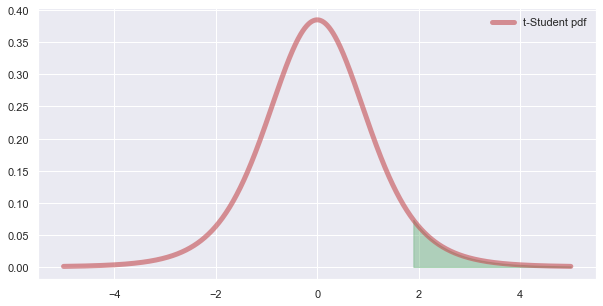

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(-5,5, 1000)
ax.plot(x, t_student.pdf(x, df=graus_de_liberdade), 'r-', lw=5, alpha=0.6, label='t-Student pdf')

x_fill = np.linspace(t, 5, 1000)
ax.fill_between(x_fill, t_student.pdf(x_fill, df=graus_de_liberdade), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

### <font color=green\> F de Snedecor <font>

**Exemplo** - Um cientista de dados está avaliando uma variável com distribuição F de Snedecor. Tal variável apresenta 17 graus de liberdade no numerador e 28 graus de liberdade no denominador. Determine:  
a) A probabilidade de que encontre X > 1,5.  
b) A probabilidade de que encontre X < 1,0.  
c) A probabilidade de que encontre 2<X<3.  
d) O valor de F para que P(X>x) = 5%.  

In [194]:
from scipy import stats

In [195]:
grau_de_liberade_numerador = 17
grau_de_liberdade_denominador = 28

a) A probabilidade de que encontre X > 1,5. 

In [196]:
# P(X > 1.5) = ?
probabilidade = stats.f.sf(1.5,grau_de_liberade_numerador, grau_de_liberdade_denominador)*100
print('probabilidade = %.2f' % probabilidade)

probabilidade = 16.61


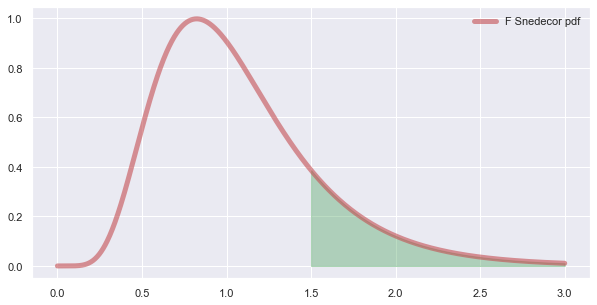

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0, 3, 1000)
ax.plot(x, stats.f.pdf(x, grau_de_liberade_numerador, grau_de_liberdade_denominador), 'r-', lw=5, alpha=0.6, label='F Snedecor pdf')

x_fill = np.linspace(1.5, 3, 1000)
ax.fill_between(x_fill, stats.f.pdf(x_fill, grau_de_liberade_numerador, grau_de_liberdade_denominador), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

b) A probabilidade de que encontre X < 1,0. 

In [198]:
# P(X < 1.0) = ?
probabilidade = stats.f.cdf(1.0,grau_de_liberade_numerador, grau_de_liberdade_denominador)
print('probabilidade = %.4f' % probabilidade)

probabilidade = 0.5142


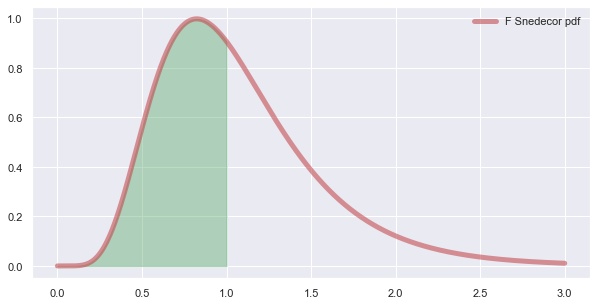

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0, 3, 1000)
ax.plot(x, stats.f.pdf(x, grau_de_liberade_numerador, grau_de_liberdade_denominador), 'r-', lw=5, alpha=0.6, label='F Snedecor pdf')

x_fill = np.linspace(0, 1, 1000)
ax.fill_between(x_fill, stats.f.pdf(x_fill, grau_de_liberade_numerador, grau_de_liberdade_denominador), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

c) A probabilidade de que encontre 2<X<3. 

In [200]:
# P(X > 2) = ? e P(X < 3) = ?
prob_inferior = stats.f.cdf(2, grau_de_liberade_numerador, grau_de_liberdade_denominador)
prob_superior = stats.f.cdf(3, grau_de_liberade_numerador, grau_de_liberdade_denominador)
probabilidade = prob_superior - prob_inferior
print('prob_superior = %.4f' % prob_superior)
print('prob_inferior = %.4f' % prob_inferior)
print('probabilidade = %.4f' % probabilidade)

prob_superior = 0.9951
prob_inferior = 0.9496
probabilidade = 0.0455


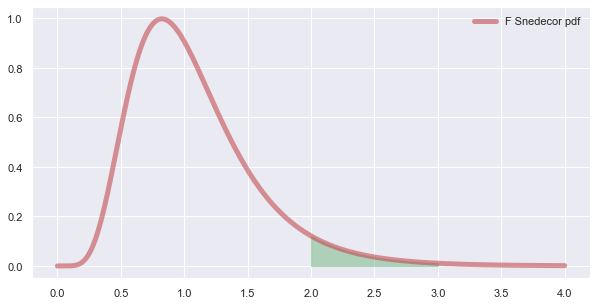

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0, 4, 1000)
ax.plot(x, stats.f.pdf(x, grau_de_liberade_numerador, grau_de_liberdade_denominador), 'r-', lw=5, alpha=0.6, label='F Snedecor pdf')

x_fill = np.linspace(2, 3, 1000)
ax.fill_between(x_fill, stats.f.pdf(x_fill, grau_de_liberade_numerador, grau_de_liberdade_denominador), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

d) O valor de F para que P(X>x) = 5%. 

In [202]:
# P(X>x) = 0.05
f_ = stats.f.ppf(0.95, grau_de_liberade_numerador, grau_de_liberdade_denominador)
print('f = %.4f' % f_ )

f = 2.0030


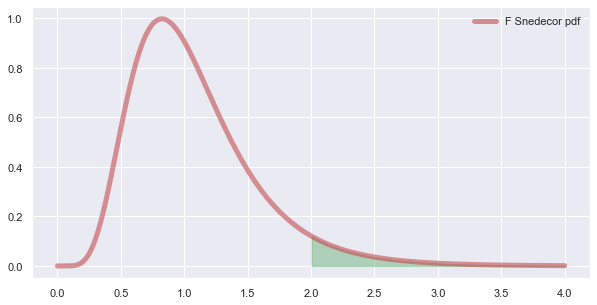

In [203]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

x = np.linspace(0, 4, 1000)
ax.plot(x, stats.f.pdf(x, grau_de_liberade_numerador, grau_de_liberdade_denominador), 'r-', lw=5, alpha=0.6, label='F Snedecor pdf')

x_fill = np.linspace(f_, 4, 1000)
ax.fill_between(x_fill, stats.f.pdf(x_fill, grau_de_liberade_numerador, grau_de_liberdade_denominador), color ='g', alpha=0.4)

ax.legend(loc='best', frameon=False)
plt.show()

# <font color=green\> Testes de Hipóteses <font>

### <font color=green\> Teste Bilateral (bicaudal) <font>

### <font color=green\> Teste Unilateral à Esquerda <font>

### <font color=green\> Teste Unilateral à Direita <font>

### <font color=green\> Tipos de erros <font>

### <font color=green\> Significância do teste <font>

### <font color=green\> P-valor e nível de significância <font>

### <font color=green\> Teste Z para médias de uma amostra <font>

**Exercício** - Um fabricante de caixas de papelão deseja verificar se a quantidade de papelão que está sendo utilizada em cada caixa do tipo 1 está de acordo com seu padrão histórico, pois existem indícios de que o consumo aumentou. Historicamente, são utilizados, em média, 100 g de papelão em cada caixa e o desvio padrão é de 12g. Coletou-se uma amostra para verificar se a média atual é maior do que a média histórica.

In [206]:
amostra = pd.read_excel('Planilha Suporte - Introdução Estatística (Final).xlsx', sheet_name='Teste Z Médias' ,usecols='A',  engine="openpyxl")

In [259]:
# Dados da amostra
amostra.dropna(inplace=True)
amostra.rename(columns = {'Quantidade (g)':'quantidade'}, inplace=True)

qtd_observacoes = np.array(amostra.count())
media_amostra = np.array(amostra.mean())
desvio_amostra = np.array(amostra.std())

print('quantidade de observações: %.d' % qtd_observacoes)
print('média da amostra: %.2f' % media_amostra)
print('desvio padrão da amostra: %.2f' % desvio_amostra)

quantidade de observações: 40
média da amostra: 104.08
desvio padrão da amostra: 4.29


In [260]:
# Valores históricos
media_hist = 100
desvio_hist = 12

In [261]:
significancia = 0.05

> **Teste de hipóteses**  
H0: as médias são iguais   
H1: a média atual é maior que a média histórica

In [271]:
z = (media_amostra - media_hist)/(desvio_hist/np.sqrt(qtd_observacoes))
print('z = %.4f' % z)

z = 2.1477


In [264]:
from scipy.stats import norm

In [272]:
p_valor = stats.norm.sf(z)
print('p = %.4f' % p_valor)

p = 0.0159


In [273]:
z_critico = stats.norm.ppf(0.95)
print('z_critico = %.4f' % z_critico)

z_critico = 1.6449


In [275]:
if z >= z_critico:
    print('Rejeitar H0')
else:
    print('Não rejeitar H0')

Rejeitar H0


### <font color=green\> Teste t para médias de uma amostra <font>

**Exercício** - O tempo médio de processamento de determinada tarefa em uma
máquina tem sido de 18 minutos. Foram introduzidos novos conceitos para
reduzir o tempo médio de processamento. Desta forma, após certo período,
coletou-se uma amostra de 25 elementos, obtendo-se o tempo médio de
16,808 minutos com desvio-padrão de 2,733 minutos. Verifique se esse
resultado evidencia uma melhora no tempo médio de processamento.
Considere α = 1%. (Fonte: Fávero e Belfiore, 2017, Cap. 7)

In [276]:
# população
media_hist = 18

# amostra
n = 25
media_amostra = 16.808
desvio = 2.733

significancia = 0.01
confianca = 1 - 0.01

> **Teste de hipótese**  
H0: o tempo médio de processamento da amostra é igual ao tempo médio histórico  
H1: o tempo médio de processamenta da amostra é igual ou menor que ao tempo médio histórico

In [301]:
# Padronizar a média da amostra 
t = (media_amostra - media_hist)/(desvio/np.sqrt(n))
print('t = %.4f' % t)

t = -2.1808


In [280]:
from scipy.stats import t as t_student

In [299]:
# Valor p
p_valor = t_student.cdf(t,df=n-1)
print('p = %.4f' % p_valor)

p = 0.0196


In [303]:
# valor crítico t_alfa
t_alfa = t_student.ppf(0.01, n-1)
print('t_alfa = %.4f' % t_alfa)

t_alfa = -2.4922


In [298]:
# teste
if abs(t_alfa) >= abs(t):
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0


### <font color=green\> Teste t para correlações <font>

Teste já realizado anteriormente em correlações

### <font color=green\> Teste qui-quadrado para uma amostra <font>

**Exemplo** - Uma loja deseja verificar se a quantidade vendida em cada dia da
semana varia em função do dia da semana. Os dados para as vendas em cada
dia de uma semana escolhida aleatoriamente foram tabulados. Neste caso, o
objetivo é testar se a frequência observada e esperada são iguais ou se são
diferentes. (Fonte: Fávero e Belfiore, 2017, Cap. 8)

In [304]:
F_O = [35,24,27,32,25,36,31]
F_E = [30,30,30,30,30,30,30]

In [306]:
n_obs = len(F_O)

> **Teste de hipótese**  
H0: frequência observada é igual a frequência esperada  
H1: frequência observada é diferent da frequência esperada

In [305]:
from scipy.stats import chisquare

In [334]:
chisq, p_valor = chisquare(F_O, F_E)
print('chi_quadrado = %.4f' % chisq)
print('p_valor = %.4f' % p_valor)

chi_quadrado = 4.5333
p_valor = 0.6049


In [311]:
from scipy.stats import chi2

In [335]:
# valor crítico
valor_critico = chi2.ppf(0.95, df=n_obs-1)
print('valor crítico = %.4f' % valor_critico)

valor crítico = 12.5916


In [339]:
if chisq >= valor_critico:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Não rejeito H0


### <font color=green\> Teste F para comparação de variâncias <font>

**Exercício** - Uma empresa de logística está analisando qual entre duas rotas
oferece a melhor previsibilidade para o horário de entrega ao seu maior
cliente. Foram coletados dados sobre o tempo de entrega durante 35 dias
para cada rota. O diretor de logística deseja testar a hipótese que a rota B tem
maior variabilidade no tempo de entrega, comparativamente à rota A.

> **Teste de hipótese**  
H0: as variâncias são iguais  
H1: a variância da rota B é maior que a variância da rota A

In [340]:
# import da base
dados = pd.read_excel('Planilha Suporte - Introdução Estatística (Final).xlsx', sheet_name='Teste F Variâncias' ,usecols='A:B',  engine="openpyxl", nrows=36)

In [342]:
dados.dropna(inplace=True)

In [344]:
# Rota A
media_A = dados['Rota A'].mean()
desvio_A = dados['Rota A'].std()

# Rota B
media_B = dados['Rota B'].mean()
desvio_B = dados['Rota B'].std()

In [346]:
print('media A: %.4f\ndesvio A: %.4f' % (media_A, desvio_A))

media A: 117.6286
desvio A: 10.4995


In [347]:
print('media B: %.4f\ndesvio B: %.4f' % (media_B, desvio_B))

media B: 101.2286
desvio B: 16.3223


In [350]:
n_obs = 35
significancia = 0.05

In [345]:
from scipy.stats import f

In [349]:
# Estatística F
f_ = (desvio_B**2)/(desvio_A**2)
print('f = %.4f' % f_)

f = 2.4167


In [364]:
p_valor = f.sf(f_, dfn = n_obs-1, dfd = n_obs-1)
print('p-valor = %.5f' % p_valor)

p-valor = 0.00596


In [367]:
# valor crítico
valor_critico = f.ppf(0.95, dfn= n_obs - 1,dfd=n_obs - 1)
print('f crítico = %.4f' % valor_critico)

f crítico = 1.7721


In [369]:
if valor_critico <= f_:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0


In [371]:
if p_valor <= significancia:
    print('Rejeito H0')
else:
    print('Não rejeito H0')

Rejeito H0
